In [56]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np 

In [57]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [58]:
X_train = X_train / 255
X_test = X_test / 255

In [59]:
# Flatten the array
X_train_flattend = X_train.reshape(len(X_train), 28*28)
X_test_flattend = X_test.reshape(len(X_test), 28*28)

Model With No Hidden Layer


In [37]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,),activation='sigmoid')
])

# compile the model 
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

model.fit(X_train_flattend, y_train, epochs = 5)

c:\Users\aasth\Downloads\Deep-Learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8151 - loss: 0.7152
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9128 - loss: 0.3131
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9213 - loss: 0.2793
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9247 - loss: 0.2694
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9260 - loss: 0.2660


In [38]:
# Evaluate the model on test data set
model.evaluate(X_test_flattend, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9131 - loss: 0.3042


[0.2695830166339874, 0.9247000217437744]

In [39]:
y_predicted = model.predict(X_test_flattend)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [41]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

Text(50.722222222222214, 0.5, 'Truth')

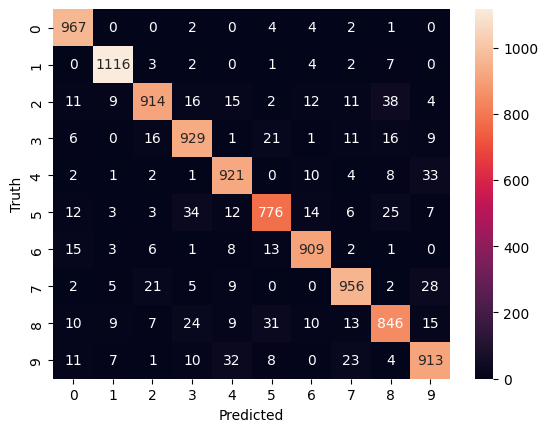

In [42]:
import seaborn as sn 
plt.Figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Model With One Hidden Layer


In [43]:
# add a hidden layer 
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

# compile the model 
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

model.fit(X_train_flattend, y_train, epochs = 5)

c:\Users\aasth\Downloads\Deep-Learning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8734 - loss: 0.4554
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9603 - loss: 0.1335
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9746 - loss: 0.0878
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9812 - loss: 0.0634
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9849 - loss: 0.0481


In [44]:
model.evaluate(X_test_flattend, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9739 - loss: 0.0892


[0.0782904401421547, 0.9767000079154968]

In [48]:
y_predicted_improved = model.predict(X_test_flattend)
y_predicted_labels_imporoved = [np.argmax(i) for i in y_predicted_improved]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [49]:
cm_improved = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels_imporoved)

Text(50.722222222222214, 0.5, 'Truth')

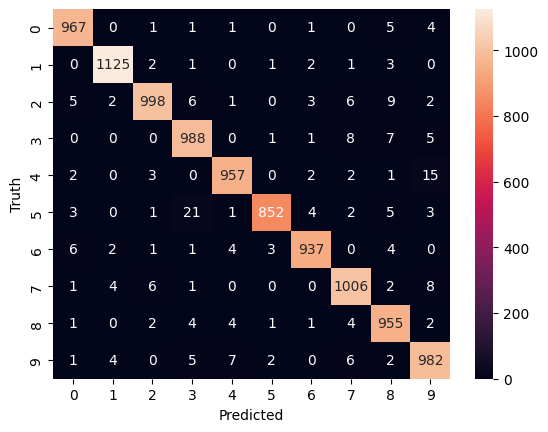

In [50]:
import seaborn as sn 
plt.Figure(figsize=(10,7))
sn.heatmap(cm_improved, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Exercise: Use Different Loss as Well as Activation functions


In [61]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

# compile the model 
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8708 - loss: 0.4648
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9626 - loss: 0.1304
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9733 - loss: 0.0878
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9797 - loss: 0.0664
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9855 - loss: 0.0483
